# 회귀분석 과제
22 July 2021(Thu)

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 19기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [15]:
# train 데이터 불러오기
df = pd.read_csv("C:/Users/jyj98/Documents/DAexercise/graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [16]:
# test 데이터 불러오기
test = pd.read_csv("C:/Users/jyj98/Documents/DAexercise/graduate_test.csv")

# test 데이터 크기 확인
print("data size:", test.shape)

# test 데이터 훑어보기
test.head(10)

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [17]:
## TODO
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 결측치는 없습니다. isnull()함수를 이용하여 확인하였습니다.

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [18]:
## TODO
df.info()
df = pd.get_dummies(df)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.1+ KB


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_No,Research_Yes
0,310,105,2,3.0,3.5,8.01,0.71,1,0
1,307,105,2,2.5,4.5,8.12,0.67,0,1
2,329,111,4,4.5,4.0,9.01,0.81,0,1
3,300,105,1,1.0,2.0,7.80,0.58,1,0
4,329,114,5,4.0,5.0,9.30,0.86,0,1


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. Research변수가 범주형입니다. info()함수를 이용하여 Dtype을 확인 후 더미변수로 변환

# 3. 선형(Linear) 회귀

In [19]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [20]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [21]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 8)
training response size: (320,)
test predictors size: (80, 8)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
linear = LinearRegression()

# 2. 모델을 적합시킵니다.
## TODO
linear.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print('Training R^2: %.2f' %linear.score(X_train, y_train))


Training R^2: 0.83


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO

y_pred = linear.predict(X_test)


print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0040
Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [26]:
## TODO

print('intercept:', linear.intercept_)


intercept: -1.2419421437018654


Q. 절편 계수의 의미는 무엇인가요?  
A. 모든 독립변수들이 0일 때 chance of admit의 추정값이 절편이다. 그런데 모든 독립변수가 0인 것은 가능하지만 chance of admit이 음수일 수는 없으므로 모델을 수정할 필요가 있다.

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [27]:
## TODO

beta = pd.DataFrame(linear.coef_, index=X.columns, columns=['slope'])
beta

,slope
GRE Score,0.001640
TOEFL Score,0.003606
University Rating,0.002748
SOP,0.007253
LOR,0.017343
CGPA,0.112079
Research_No,-0.013241
Research_Yes,0.013241


Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 기울기 계수의 절댓값은 해당 변수와 종속변수간의 상관관계의 정도를 나타내며, 양수일 경우 양의 상관관계, 음수일 경우 음의 상관관계를 가진 것으로 해석할 수 있다. 그 상관관계가 통계적으로 유의한지는 이것만으로는 알 수 없고, F검정과 t검정을 통해 전체 회귀모형과 개별 계수의 유의성을 검정하여야 한다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

[]

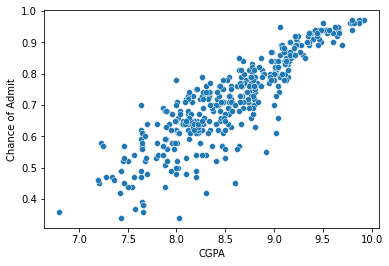

In [28]:
## TODO

sns.scatterplot(x="CGPA", y="Chance of Admit", data=df)
plt.plot()

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

[]

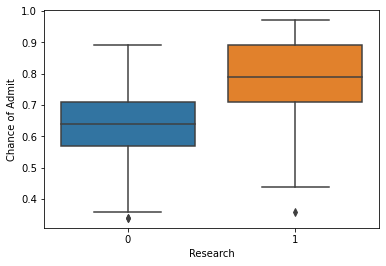

In [37]:
## TODO
sns.boxplot(x='Research_Yes', y='Chance of Admit', data=df)
plt.xlabel('Research')
plt.plot()

### 3.2. StatsModels로 선형 회귀 시행하기

In [38]:
import statsmodels.api as sm

In [39]:
## TODO

model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.6
Date:                Mon, 26 Jul 2021   Prob (F-statistic):          1.99e-114
Time:                        10:59:00   Log-Likelihood:                 449.18
No. Observations:                 320   AIC:                            -882.4
Df Residuals:                     312   BIC:                            -852.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0016      0.001      2.571      0.011       0.000       0.003
TOEFL Score           0.0036      0.001      3.161      0.002       0.001       0.006
University Rating     0.0027      0.005      0.582      0.561      -0.007       0.012
SOP                   0.0073      0.006      1.273      0.204      -0.004       0.018
LOR                   0.0173      0.005      3.391      0.001       0.007       0.027
CGPA                  0.1121      0.012      9.237      0.000       0.088       0.136
Research_No          -1.2552      0.132     -9.498      0.000      -1.515      -0.995
Research_Yes         -1.2287      0.136     -9.065      0.000      -1.495      -0.962
==============================================================================
Omnibus:                       72.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.598
Skew:                          -1.110   Prob(JB):                     2.99e-36
Kurtosis:                       5.710   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. R^2와 F통계량만을 보면, 꽤 좋은 모델이라고 할 수 있다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. 영향이 거의 무의미하다고 해석할 수 있다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [54]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
ridge = RidgeCV(alphas = [0.05, 0.01, 0.001])

# 2. 모델을 적합시킵니다.
## TODO
ridge.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print('Training R^2: %.2f'%ridge.score(X_train, y_train))

print("intercept:", ridge.intercept_)
beta = pd.DataFrame(ridge.coef_, index=X_train.columns, columns=["slope"])
print(beta)

print('----------------------------------------------------------')
print('Testing R^2: %.2f'% ridge.score(X_test, y_test))



Training R^2: 0.83
intercept: -1.2423809328376267
                      slope
GRE Score          0.001645
TOEFL Score        0.003612
University Rating  0.002762
SOP                0.007271
LOR                0.017361
CGPA               0.111858
Research_No       -0.013235
Research_Yes       0.013235
----------------------------------------------------------
Testing R^2: 0.77


In [55]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
lasso = LassoCV(alphas=[0.05, 0.01, 0.001])

# 2. 모델을 적합시킵니다.
## TODO
lasso.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print('Training R^2: %.2f'% lasso.score(X_train, y_train))

print("intercept:", lasso.intercept_)
beta = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=["slope"])
print(beta.sort_values("slope"))

print('--------------------------------------------------------------------')
print('Testing R^2: %.2f'% lasso.score(X_test, y_test))


Training R^2: 0.83
intercept: -1.3074311280577853
                          slope
Research_No       -2.109332e-02
Research_Yes       1.414522e-18
GRE Score          2.016379e-03
University Rating  2.952840e-03
TOEFL Score        3.937461e-03
SOP                6.997193e-03
LOR                1.767293e-02
CGPA               1.028328e-01
--------------------------------------------------------------------
Testing R^2: 0.77
